In [ ]:
'''
    Dataset cats dogs pandas: là một bộ dataset dữ liệu ảnh động vật bao gồm 2200 ảnh
    1000 cat, 1000 dog và 200 panda
    https://www.kaggle.com/datasets/vuminhhoangg/cats-dogs-pandas

'''

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [10]:
data_dir = '/kaggle/input/cats-dogs-pandas/train'
def load(folder, target_size=(28, 28), max_images=100):
    images = []
    count = 0
    for filename in os.listdir(folder):
        if count >= max_images:
            break
        img_path = os.path.join(folder, filename)
        img = imread(img_path)
        img_resized = resize(img, target_size)  
        if img_resized.shape == (target_size[0], target_size[1], 3):  
            images.append(img_resized.flatten())  
            count += 1
    return np.array(images)


cats_images = load(os.path.join(data_dir, 'cats'), max_images=100)
dogs_images = load(os.path.join(data_dir, 'dogs'), max_images=100)
pandas_images = load(os.path.join(data_dir, 'pandas'), max_images=100)

X = np.concatenate((cats_images, dogs_images, pandas_images))
y = np.concatenate((np.zeros(len(cats_images)), np.ones(len(dogs_images)), np.ones(len(pandas_images)) * 2))

In [21]:
'''
  X_shape là 300 * 2352 vì có 300 ảnh, mỗi ảnh là 28*28 với 3 kênh màu RGB
  Nên flatten ra thì thành 28*28*3
'''
X.shape

(300, 2352)

In [22]:
# PCA để giảm số chiều xuống 2 cho dễ trực quan hóa
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

In [24]:
X_pca.shape

(300, 2)

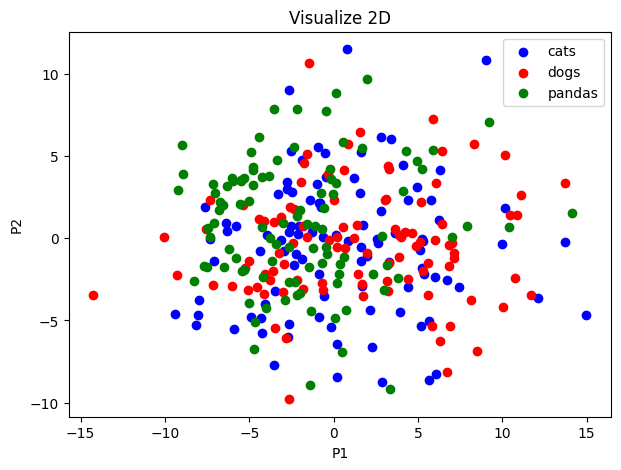

In [33]:
'''
    Vẽ đồ thị plot 3 nhãn ở không gian 2D

'''
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='blue', label='cats')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='red', label='dogs')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], color='green', label='pandas')
plt.title('Visualize 2D')
plt.xlabel('P1')
plt.ylabel('P2')
plt.legend()
plt.show()


In [ ]:
'''
    Tiếp theo ta áp dụng K-means với X_pca (hoàn toàn không biết nhãn)
    Tuy nhiên, hiệu quả của K-means trong trường hợp này sẽ thấp:
    - cụm không hình tròn, dữ liệu đã đan hẳn vào nhau
    - PCA đã làm mất nhiều đặc trưng của dữ liệu, đôi khi không phản ảnh được gì

'''

In [29]:
n_clusters = 3 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

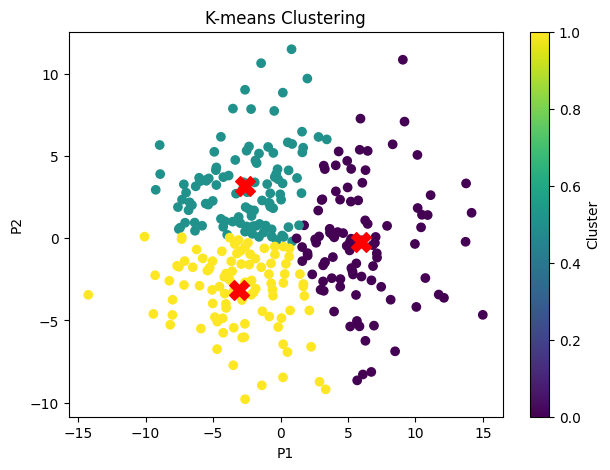

In [32]:
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('K-means Clustering')
plt.xlabel('P1')
plt.ylabel('P2')
plt.colorbar(label='Cluster')
plt.show()
